In [ ]:
# Let's build a couple of autoencoders
# https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense,  Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers

from tensorflow.keras import backend as K

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
## Simplest example

# this is the size of our encoded representations
encoding_dim = 10  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

W0607 16:16:49.321706 4650175936 deprecation.py:506] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='Adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               8624      
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0896 - val_loss: 0.0590
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0502 - val_loss: 0.0441
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0418 - val_loss: 0.0391
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0380 - val_loss: 0.0362
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0359 - val_loss: 0.0348
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0348 - val_loss: 0.0340
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0341 - val_loss: 0.0334
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0335 - val_loss: 0.0328
Epoch 9/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0330 - val_

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

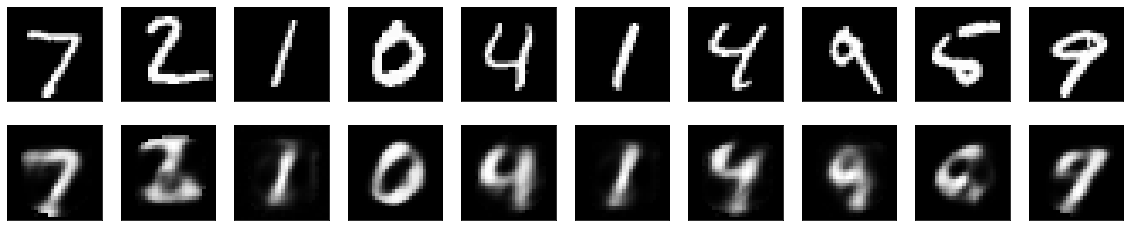

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Adding sparsity to avoid just reproducing PCA
#encoding_dim = 32

#input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
#encoded = Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input_img)
#decoded = Dense(784, activation='sigmoid')(encoded)

#autoencoder2 = Model(input_img, decoded)

In [ ]:
# this model maps an input to its encoded representation
#encoder2 = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
#encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder2.layers[-1]
# create the decoder model
#decoder2 = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
#autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy')
#autoencoder2.summary()

In [ ]:
#autoencoder2.fit(x_train, x_train,
#                epochs=100,
#                batch_size=256,
#                shuffle=True,
#                validation_data=(x_test, x_test))

In [ ]:
#encoded_imgs2 = encoder2.predict(x_test)
#decoded_imgs2 = decoder2.predict(encoded_imgs2)

In [ ]:
#n = 10  # how many digits we will display
#plt.figure(figsize=(20, 4))
#for i in range(n):
    # display original
#    ax = plt.subplot(2, n, i + 1)
#    plt.imshow(x_test[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
#    ax = plt.subplot(2, n, i + 1 + n)
#    plt.imshow(decoded_imgs2[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#plt.show()

In [ ]:
#ideally: not much of a difference to before. but more sparse representation

In [22]:
encoding_dim = 2

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

decoder = Model(encoded_input,decoded)

x=encoder(input_img)
autoencoder=decoder(x)

autoencoder=Model(input_img,autoencoder)

In [23]:
autoencoder.summary()
encoder.summary()
decoder.summary()

autoencoder.compile(optimizer='adam', loss='mse')

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
model_11 (Model)             (None, 2)                 108866    
_________________________________________________________________
model_12 (Model)             (None, 784)               109648    
Total params: 218,514
Trainable params: 218,514
Non-trainable params: 0
_________________________________________________________________
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
__________________________________

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0735 - val_loss: 0.0575
Epoch 2/100
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0549 - val_loss: 0.0520
Epoch 3/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0505 - val_loss: 0.0488
Epoch 4/100
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0481 - val_loss: 0.0471
Epoch 5/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0467 - val_loss: 0.0460
Epoch 6/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0456 - val_loss: 0.0451
Epoch 7/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0448 - val_loss: 0.0442
Epoch 8/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0440 - val_loss: 0.0435
Epoch 9/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.

KeyboardInterrupt: 

In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

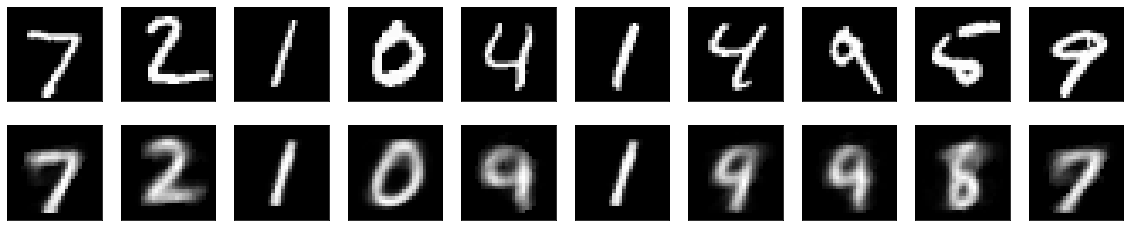

In [26]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [34]:
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)           0  

In [35]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [36]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1139 - val_loss: 0.1140
Epoch 2/50
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 3/50
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 4/50
60000/60000 [==============================] - 190s 3ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 5/50
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 6/50
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 7/50
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 8/50
60000/60000 [==============================] - 184s 3ms/sample - loss: 0.1120 - val_loss: 0.1140
Epoch 9/50
60000/60000 [==============================] - 200s 3ms/sample - loss: 0.11

KeyboardInterrupt: 

In [12]:
decoded_imgs = autoencoder.predict(x_test)

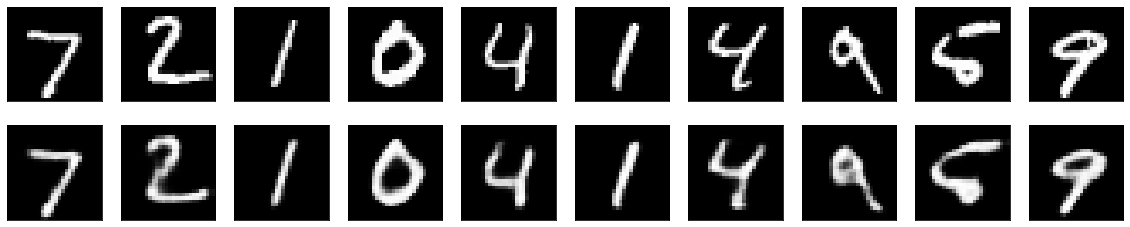

In [13]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.clf()

In [26]:
# Denoising

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

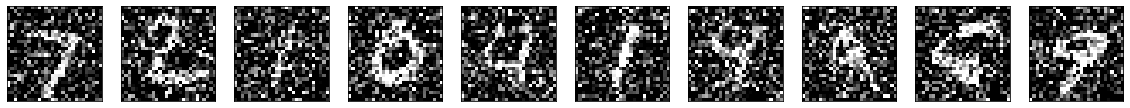

In [27]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.2781 - val_loss: 12.1360
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2374 - val_loss: 12.1531
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.2492 - val_loss: 12.0532
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2340 - val_loss: 12.0829
Epoch 5/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.2005 - val_loss: 12.1512
Epoch 6/100
60000/60000 [==============================] - 5s 88us/step - loss: 12.2009 - val_loss: 12.0408
Epoch 7/100
60000/60000 [==============================] - 5s 87us/step - loss: 12.1953 - val_loss: 12.0599
Epoch 8/100
60000/60000 [==============================] - 5s 86us/step - loss: 12.1737 - val_loss: 12.0195
Epoch 9/100
60000/60000 [==============================] - 5s 85us/step - loss: 12.152

KeyboardInterrupt: 

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

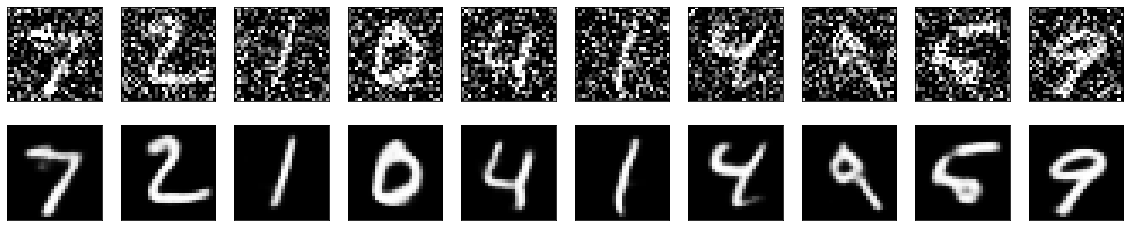

In [28]:
# add images here

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()